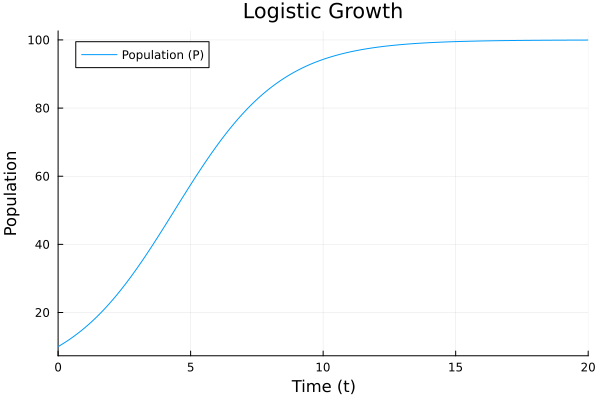

In [4]:
using DifferentialEquations
using Plots

# 1. Define the Function
# u = [P] (Population)
# p = [r, K] (Growth rate, Carrying capacity)
function logistic_growth!(du, u, p, t)
    P = u[1]
    r, K = p # Unpack parameters
    
    du[1] = r * P * (1 - P/K) # dP/dt = r*P*(1 - P/K)
end

# 2. Define the Problem
u0 = [10.0]           # Initial condition: P(0) = 10 rabbits
tspan = (0.0, 20.0)   # Time span: 20 years
p = [0.5, 100.0]      # Parameters: r = 0.5, K = 100 rabbits

prob = ODEProblem(logistic_growth!, u0, tspan, p)

# 3. Solve the Problem
solution_logistig_growth = solve(prob)

# Plot
plot(solution_logistig_growth, label="Population (P)", xlabel="Time (t)", ylabel="Population", title="Logistic Growth")

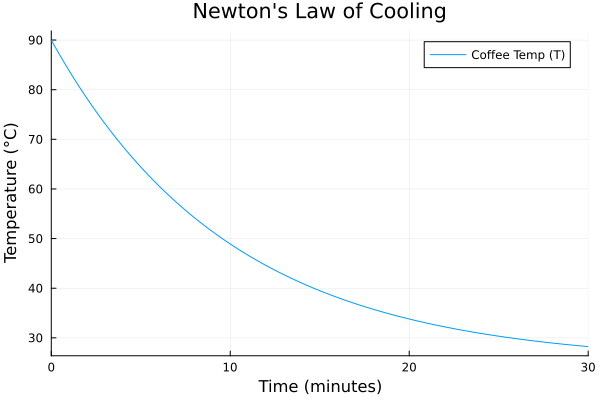

In [5]:
# 1. Define the Function
# u = [T] (Temperature of the object)
# p = [k, T_A] (Cooling constant, Ambient temperature)
function cooling!(du, u, p, t)
    T = u[1]
    k, T_A = p  # Unpack parameters
    
    du[1] = k * (T - T_A) # dT/dt = k*(T - T_A)
end

# 2. Define the Problem
u0 = [90.0]          # Initial condition: T(0) = 90°C (hot coffee)
tspan = (0.0, 30.0)  # Time span: 30 minutes
p = [-0.1, 25.0]     # Parameters: k = -0.1 (k is < 0 for cooling), T_A = 25°C

prob = ODEProblem(cooling!, u0, tspan, p)

# 3. Solve the Problem
solution_cooling = solve(prob)

# Plot
plot(solution_cooling, label="Coffee Temp (T)", xlabel="Time (minutes)", ylabel="Temperature (°C)", title="Newton's Law of Cooling")

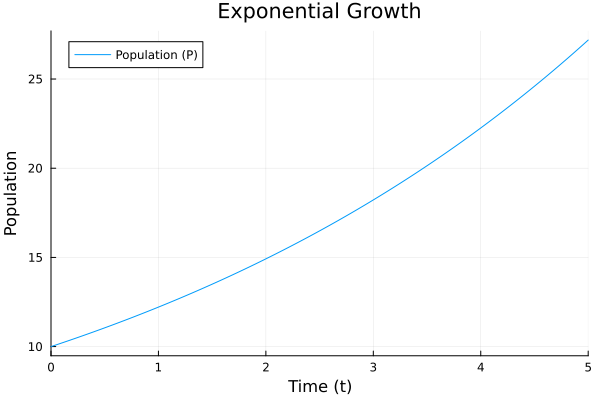

In [6]:
# 1. Define the Function: f(du, u, p, t)
# du = the derivative (what we are calculating)
# u  = the current state [P]
# p  = the parameters [r]
# t  = the current time
function exponential_growth!(du, u, p, t)
    P = u[1]
    r = p[1]
    du[1] = r * P  # This is the equation: dP/dt = r * P
end

# 2. Define the Problem
u0 = [10.0]         # Initial condition: P(0) = 10
tspan = (0.0, 5.0)   # Time span: from t=0 to t=5
p = [0.2]            # Parameters: r = 0.2

prob = ODEProblem(exponential_growth!, u0, tspan, p)

# 3. Solve the Problem
solution_exponential_growth = solve(prob)

# Plot the solution
plot(solution_exponential_growth, label="Population (P)", xlabel="Time (t)", ylabel="Population", title="Exponential Growth")

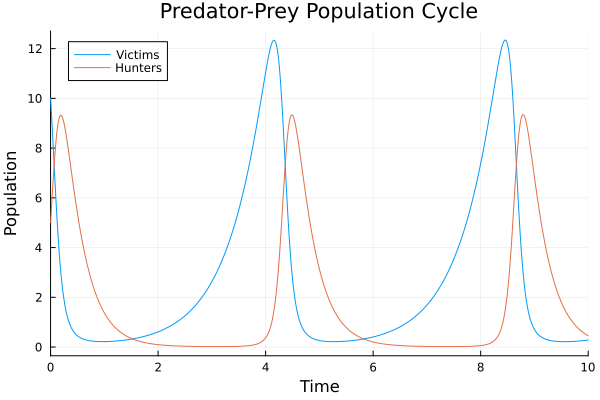

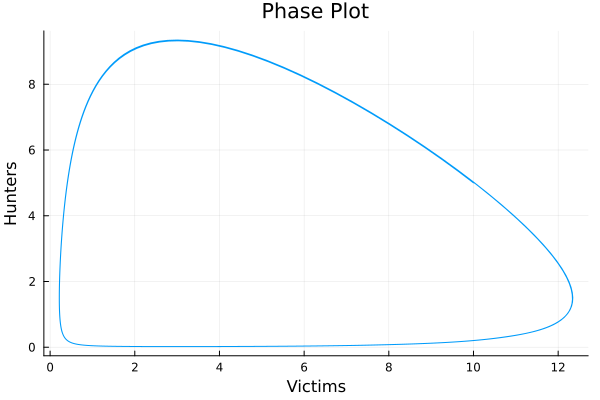

Lotka-Volterra simulation complete. Check the plots.


In [7]:
"""
Defines the Lotka-Volterra predator-prey equations.

This function modifies `du` in-place.
du[1] = d(Victims)/dt
du[2] = d(Hunters)/dt

u[1] = Number of Victims (x)
u[2] = Number of Hunters (y)

p[1] = α (alpha): Victim birth rate
p[2] = β (beta):  Victim death rate (due to being eaten)
p[3] = γ (gamma): Hunter death rate (natural causes)
p[4] = δ (delta): Hunter birth rate (from eating victims)
"""
function lotka_volterra!(du, u, p, t)
    # Unpack the state variables
    x = u[1] # Victims
    y = u[2] # Hunters
    
    # Unpack the parameters
    α, β, γ, δ = p
    
    # Lotka-Volterra Equations
    # 1. Victim population change:
    #    (Victims are born) - (Victims are eaten)
    du[1] = α*x - β*x*y
    
    # 2. Hunter population change:
    #    (Hunters are born) - (Hunters die off)
    du[2] = δ*x*y - γ*y
end

# --- Set up and solve the problem ---

# Initial conditions
u0 = [10.0, 5.0]  # 10 victims, 5 hunters

# Time span
tspan = (0.0, 10.0)

# Parameters [α, β, γ, δ]
# These values are chosen to show a nice cycle
p = [1.5, 1.0, 3.0, 1.0]

# 1. Define the ODE problem
prob = ODEProblem(lotka_volterra!, u0, tspan, p)

# 2. Solve the problem
#    Tsit5() is a good standard solver (Runge-Kutta)
solution_lotka_volterra = solve(prob, Tsit5())

# 3. Plot the results

# Plot 1: Populations over time
time_plot = plot(solution_lotka_volterra,
    xlabel="Time",
    ylabel="Population",
    title="Predator-Prey Population Cycle",
    label=["Victims" "Hunters"]
)
display(time_plot)

# Plot 2: Phase-space plot (Victims vs. Hunters)
# This plot clearly shows the repeating cycle.
phase_plot = plot(solution_lotka_volterra,
    idxs=(1, 2), # Plot u[1] on x-axis, u[2] on y-axis
    xlabel="Victims",
    ylabel="Hunters",
    title="Phase Plot",
    legend=false
)
display(phase_plot)

println("Lotka-Volterra simulation complete. Check the plots.")


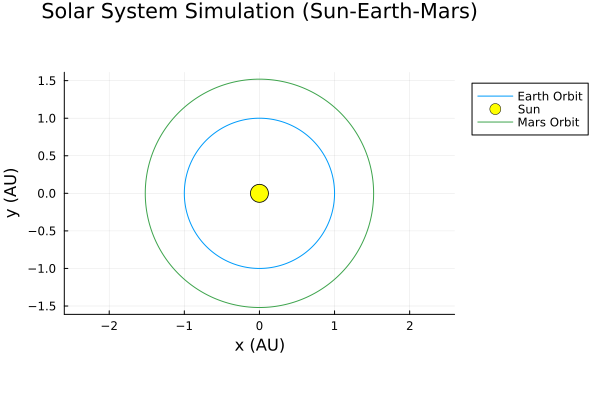

Solar system simulation complete. Check the plot.


In [8]:
"""
Defines the equations of motion for a simplified solar system.
This model is a 3-body problem (Sun, Earth, Mars).

We use astronomical units (AU), solar masses (M☉), and years.
- Distance: 1 AU = distance from Earth to Sun
- Mass: 1 M☉ = mass of the Sun
- Time: 1 year

In this system, the gravitational constant G ≈ 4π².

The Sun is assumed to be stationary at (0, 0) and is a parameter,
not part of the state vector `u`.

STATE VECTOR (u):
u[1] = x_earth
u[2] = y_earth
u[3] = vx_earth (velocity of Earth in x)
u[4] = vy_earth (velocity of Earth in y)
u[5] = x_mars
u[6] = y_mars
u[7] = vx_mars
u[8] = vy_mars

PARAMETERS (p):
p[1] = G (Gravitational constant)
p[2] = M_sun (Mass of Sun)
p[3] = m_earth (Mass of Earth)
p[4] = m_mars (Mass of Mars)
"""
function solar_system!(du, u, p, t)
    # Unpack parameters
    G, M_sun, m_earth, m_mars = p
    
    # Unpack Earth's state
    x_e, y_e, vx_e, vy_e = u[1], u[2], u[3], u[4]
    
    # Unpack Mars' state
    x_m, y_m, vx_m, vy_m = u[5], u[6], u[7], u[8]

    # --- Set position derivatives ---
    # dx_e/dt = vx_e
    du[1] = vx_e
    # dy_e/dt = vy_e
    du[2] = vy_e
    # dx_m/dt = vx_m
    du[5] = vx_m
    # dy_m/dt = vy_m
    du[6] = vy_m

    # --- Calculate forces and accelerations ---
    
    # Distances
    # Earth-Sun distance
    r_es_sq = x_e^2 + y_e^2
    r_es = sqrt(r_es_sq)
    
    # Mars-Sun distance
    r_ms_sq = x_m^2 + y_m^2
    r_ms = sqrt(r_ms_sq)
    
    # Earth-Mars distance
    dx_em = x_m - x_e
    dy_em = y_m - y_e
    r_em_sq = dx_em^2 + dy_em^2
    r_em = sqrt(r_em_sq)
    
    # --- Forces on Earth ---
    # F = G*m1*m2/r^2. F_x = F * (dx/r) = G*m1*m2*dx / r^3
    
    # 1. Force on Earth from Sun
    F_es_x = -G * M_sun * m_earth * x_e / (r_es^3)
    F_es_y = -G * M_sun * m_earth * y_e / (r_es^3)
    
    # 2. Force on Earth from Mars
    F_em_x = G * m_earth * m_mars * dx_em / (r_em^3)
    F_em_y = G * m_earth * m_mars * dy_em / (r_em^3)
    
    # Total acceleration on Earth (a = F_total / m_earth)
    a_e_x = (F_es_x + F_em_x) / m_earth
    a_e_y = (F_es_y + F_em_y) / m_earth
    
    # --- Forces on Mars ---
    
    # 1. Force on Mars from Sun
    F_ms_x = -G * M_sun * m_mars * x_m / (r_ms^3)
    F_ms_y = -G * M_sun * m_mars * y_m / (r_ms^3)
    
    # 2. Force on Mars from Earth (Newton's 3rd Law)
    F_me_x = -F_em_x
    F_me_y = -F_em_y
    
    # Total acceleration on Mars (a = F_total / m_mars)
    a_m_x = (F_ms_x + F_me_x) / m_mars
    a_m_y = (F_ms_y + F_me_y) / m_mars

    # --- Set velocity derivatives (dv/dt = a) ---
    du[3] = a_e_x
    du[4] = a_e_y
    du[7] = a_m_x
    du[8] = a_m_y
end

# --- Set up and solve the problem ---

# Parameters
G = 4 * (pi^2)
M_sun = 1.0
m_earth = 3.0e-6  # (Mass of Earth / Mass of Sun)
m_mars = 3.2e-7   # (Mass of Mars / Mass of Sun)
p = [G, M_sun, m_earth, m_mars]

# Initial Conditions (in AU and AU/year)
# We start them aligned on the x-axis for simplicity
# v = sqrt(G*M / r) for a circular orbit

# Earth (1 AU from Sun)
x_e_0 = 1.0
y_e_0 = 0.0
vx_e_0 = 0.0
vy_e_0 = sqrt(G * M_sun / x_e_0) # ≈ 6.28 AU/year (2π)

# Mars (1.52 AU from Sun)
x_m_0 = 1.52
y_m_0 = 0.0
vx_m_0 = 0.0
vy_m_0 = sqrt(G * M_sun / x_m_0) # ≈ 5.09 AU/year

u0 = [x_e_0, y_e_0, vx_e_0, vy_e_0,
      x_m_0, y_m_0, vx_m_0, vy_m_0]

# Time span (simulating for 5 years)
tspan = (0.0, 5.0)

# 1. Define the ODE problem
#    We use `Vern7()` for higher accuracy, which is good for orbital mechanics
prob = ODEProblem(solar_system!, u0, tspan, p)

# 2. Solve the problem
solution_planets = solve(prob, Vern7(), reltol=1e-8, abstol=1e-8)

# 3. Plot the results
#    We plot the (x, y) coordinates of each planet to see the orbits.

# `idxs` selects which variables to plot.
# `(1, 2)` plots (x_earth, y_earth)
# `(5, 6)` plots (x_mars, y_mars)
orbit_plot = plot(solution_planets, idxs=(1, 2),
    label="Earth Orbit",
    title="Solar System Simulation (Sun-Earth-Mars)",
    xlabel="x (AU)",
    ylabel="y (AU)",
    aspect_ratio=:equal, # Makes orbits look circular, not oval
    legend=:outertopright
)

# Plot the Sun at the center
scatter!(orbit_plot, [0], [0], label="Sun", markersize=10, markercolor=:yellow)

# Add Mars' orbit to the same plot
plot!(orbit_plot, solution_planets, idxs=(5, 6), label="Mars Orbit")

display(orbit_plot)

println("Solar system simulation complete. Check the plot.")


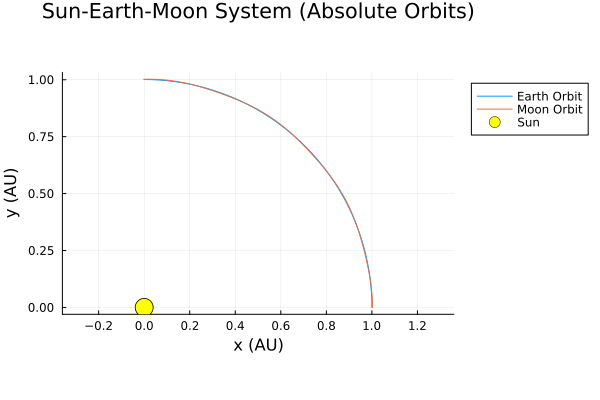

BoundsError: BoundsError: attempt to access 1-element Vector{Float64} at index [5]

In [9]:
"""
Defines the equations of motion for a simplified Sun-Earth-Moon system.
This model is a 3-body problem.

We use astronomical units (AU), solar masses (M☉), and years.
- Distance: 1 AU = distance from Earth to Sun
- Mass: 1 M☉ = mass of the Sun
- Time: 1 year

In this system, the gravitational constant G ≈ 4π².

The Sun is assumed to be stationary at (0, 0) and is a parameter,
not part of the state vector `u`.

STATE VECTOR (u):
u[1] = x_earth
u[2] = y_earth
u[3] = vx_earth (velocity of Earth in x)
u[4] = vy_earth (velocity of Earth in y)
u[5] = x_moon
u[6] = y_moon
u[7] = vx_moon
u[8] = vy_moon

PARAMETERS (p):
p[1] = G (Gravitational constant)
p[2] = M_sun (Mass of Sun)
p[3] = m_earth (Mass of Earth)
p[4] = m_moon (Mass of Moon)
"""
function sun_earth_moon!(du, u, p, t)
    # Unpack parameters
    G, M_sun, m_earth, m_moon = p
    
    # Unpack Earth's state
    x_e, y_e, vx_e, vy_e = u[1], u[2], u[3], u[4]
    
    # Unpack Moon's state
    x_m, y_m, vx_m, vy_m = u[5], u[6], u[7], u[8]

    # --- Set position derivatives ---
    # dx_e/dt = vx_e
    du[1] = vx_e
    # dy_e/dt = vy_e
    du[2] = vy_e
    # dx_m/dt = vx_m
    du[5] = vx_m
    # dy_m/dt = vy_m
    du[6] = vy_m

    # --- Calculate forces and accelerations ---
    
    # Distances
    # Earth-Sun distance
    r_es_sq = x_e^2 + y_e^2
    r_es = sqrt(r_es_sq)
    
    # Moon-Sun distance
    r_ms_sq = x_m^2 + y_m^2
    r_ms = sqrt(r_ms_sq)
    
    # Earth-Moon distance
    dx_em = x_m - x_e
    dy_em = y_m - y_e
    r_em_sq = dx_em^2 + dy_em^2
    r_em = sqrt(r_em_sq)
    
    # --- Forces on Earth ---
    # F = G*m1*m2/r^2. F_x = F * (dx/r) = G*m1*m2*dx / r^3
    
    # 1. Force on Earth from Sun
    F_es_x = -G * M_sun * m_earth * x_e / (r_es^3)
    F_es_y = -G * M_sun * m_earth * y_e / (r_es^3)
    
    # 2. Force on Earth from Moon
    F_em_x = G * m_earth * m_moon * dx_em / (r_em^3)
    F_em_y = G * m_earth * m_moon * dy_em / (r_em^3)
    
    # Total acceleration on Earth (a = F_total / m_earth)
    a_e_x = (F_es_x + F_em_x) / m_earth
    a_e_y = (F_es_y + F_em_y) / m_earth
    
    # --- Forces on Moon ---
    
    # 1. Force on Moon from Sun
    F_ms_x = -G * M_sun * m_moon * x_m / (r_ms^3)
    F_ms_y = -G * M_sun * m_moon * y_m / (r_ms^3)
    
    # 2. Force on Moon from Earth (Newton's 3rd Law)
    F_me_x = -F_em_x
    F_me_y = -F_em_y
    
    # Total acceleration on Moon (a = F_total / m_moon)
    a_m_x = (F_ms_x + F_me_x) / m_moon
    a_m_y = (F_ms_y + F_me_y) / m_moon

    # --- Set velocity derivatives (dv/dt = a) ---
    du[3] = a_e_x
    du[4] = a_e_y
    du[7] = a_m_x
    du[8] = a_m_y
end

# --- Set up and solve the problem ---

# Parameters
G = 4 * (pi^2)
M_sun = 1.0
m_earth = 3.0e-6  # (Mass of Earth / Mass of Sun)
m_moon = 3.69e-8  # (Mass of Moon / Mass of Sun)
p = [G, M_sun, m_earth, m_moon]

# Initial Conditions (in AU and AU/year)
# We start them aligned on the x-axis for simplicity

# Earth (1 AU from Sun)
x_e_0 = 1.0
y_e_0 = 0.0
# Earth's orbital velocity around Sun: v = sqrt(G*M_sun / r)
vy_e_0 = sqrt(G * M_sun / x_e_0) # ≈ 6.28 AU/year (2π)
vx_e_0 = 0.0

# Moon (orbits Earth)
# We add the Moon's relative position and velocity to Earth's
r_me = 0.00257 # Mean Earth-Moon distance in AU
x_m_0 = x_e_0 + r_me # Start Moon "outside" Earth
y_m_0 = y_e_0

# Moon's orbital velocity around Earth: v = sqrt(G*m_earth / r_me)
# This is the velocity *relative* to Earth
v_me_rel = sqrt(G * m_earth / r_me) # ≈ 0.21 AU/year
vx_m_0 = vx_e_0
vy_m_0 = vy_e_0 + v_me_rel # Add relative velocity to Earth's velocity

u0 = [x_e_0, y_e_0, vx_e_0, vy_e_0,
      x_m_0, y_m_0, vx_m_0, vy_m_0]

# Time span (simulating for 0.25 years, or ~3 months, to see Moon's orbit)
tspan = (0.0, 0.25)

# 1. Define the ODE problem
prob = ODEProblem(sun_earth_moon!, u0, tspan, p)

# 2. Solve the problem
#    We use `Vern7()` for high accuracy, needed for orbital mechanics
solution_earth_model = solve(prob, Vern7(), reltol=1e-9, abstol=1e-9)

# 3. Plot the results

# --- Plot 1: Absolute Orbits (Earth-Sun system) ---
abs_plot = plot(solution_earth_model, idxs=(1, 2),
    label="Earth Orbit",
    title="Sun-Earth-Moon System (Absolute Orbits)",
    xlabel="x (AU)",
    ylabel="y (AU)",
    aspect_ratio=:equal,
    legend=:outertopright
)
# Add Moon's orbit (will look very close to Earth's)
plot!(abs_plot, solution_earth_model, idxs=(5, 6), label="Moon Orbit")
# Plot the Sun at the center
scatter!(abs_plot, [0], [0], label="Sun", markersize=10, markercolor=:yellow)
display(abs_plot)


# --- Plot 2: Relative Orbit (Moon around Earth) ---
# We calculate the Moon's position relative to the Earth

# sol.u is a vector of states. Each state `s` is [x_e, y_e, ..., x_m, y_m, ...]
# relative_x = x_m - x_e = s[5] - s[1]
# relative_y = y_m - y_e = s[6] - s[2]
relative_x = [s[5] - s[1] for s in sol.u]
relative_y = [s[6] - s[2] for s in sol.u]

rel_plot = plot(relative_x, relative_y,
    label="Moon's Path",
    title="Moon's Orbit Relative to Earth",
    xlabel="Relative x (AU)",
    ylabel="Relative y (AU)",
    aspect_ratio=:equal,
    legend=:outertopright
)
# Plot Earth at the center of this plot
scatter!(rel_plot, [0], [0], label="Earth", markersize=8, markercolor=:blue)
display(rel_plot)

println("Sun-Earth-Moon simulation complete. Check the plots.")


In [14]:
using Distributions
"""
    generate_measurements(sol, num_points, error_std_dev, vars_to_measure)

Takes a solution object `sol` and generates `num_points` mock measurements
for the variables specified by `vars_to_measure` (e.g., [1, 2] for u[1] and u[2]).

Adds normally distributed random noise with a mean of 0.0 and a standard
deviation of `error_std_dev` to each measurement.

Returns a NamedTuple: `(times, measurements)`
"""
function generate_measurements(sol, num_points, error_std_dev, vars_to_measure)
    # Create the noise distribution
    noise_dist = Normal(0.0, error_std_dev)
    
    # Get the number of variables we are measuring
    num_vars = length(vars_to_measure)
    
    # Create evenly spaced measurement times across the simulation span
    measurement_times = range(sol.t[1], sol.t[end], length=num_points)
    
    # Pre-allocate array to store the measurements
    # This will be a Vector of Vectors (e.g., [[x1, y1], [x2, y2], ...])
    measurements = Vector{Vector{Float64}}(undef, num_points)
    
    for (i, t) in enumerate(measurement_times)
        # Get the "true" values from the simulation at time t
        true_values = sol(t, idxs=vars_to_measure)
        
        # Generate random noise for each variable
        noise = rand(noise_dist, num_vars)
        
        # Add noise to the true values to get the "measured" values
        measurements[i] = true_values .+ noise
    end
    
    return (times = measurement_times, measurements = measurements)
end

generate_measurements

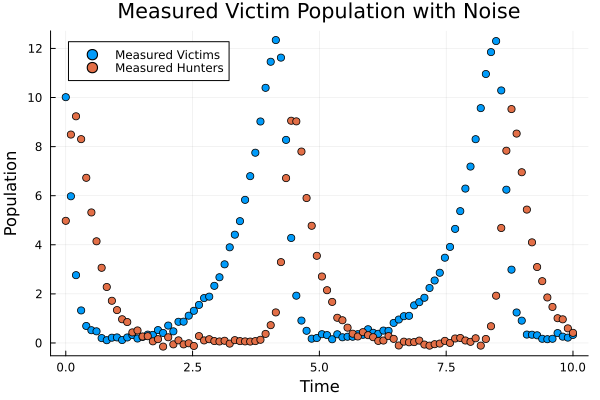

In [18]:
measured_data = generate_measurements(solution_lotka_volterra, 100, 0.1, [1, 2])

# plot the measured data. both plots in a single figure
scatter(measured_data.times, [m[1] for m in measured_data.measurements],
    label="Measured Victims",
    xlabel="Time", 
    ylabel="Population",
    title="Measured Victim Population with Noise"
)
scatter!(measured_data.times, [m[2] for m in measured_data.measurements],
    label="Measured Hunters"
)
